In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from math import sin, cos, radians, pi, atan2, degrees


In [73]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [76]:
df.fillna(method='ffill', inplace=True)
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [86]:
angles = pd.read_csv('Outputs/output_hands_2/right_hands_angles.csv')

In [23]:
x1, y1 = [1,1]
x2, y2 = [1,2]
dot = x1*x2 + y1*y2      # dot product between [x1, y1] and [x2, y2]
det = x1*y2 - y1*x2      # determinant
angle = atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

In [24]:
degrees(angle)

18.43494882292201

In [18]:
def angle_to(p1, p2, rotation=0, clockwise=False):
    angle = degrees(atan2(p2[1] - p1[1], p2[0] - p1[0])) - rotation
    if not clockwise:
        angle = -angle
    return angle % 360

In [19]:
angle_to(p1=[1,2],p2=[1,1])

90.0

In [26]:
compute_angle(v1=[1,2,0],v2=[1,1,-1])

39.2

In [9]:
def compute_angle(v1, v2, acute=True):
    # v1 is your firsr vector
    # v2 is your second vector
    # actue= True means that all angles we compute are less than 180 degrees
    angle_ = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if (acute == True):
        angle = angle_
    else:
        angle =  2 * np.pi - angle_
    return round((180 * angle/np.pi),1)

In [9]:
angles = pd.read_csv('Outputs/output_hands_2/right_hands_angles.csv')

In [24]:
def create_fingle_list():
    finger_list_point = np.array(['_1','_2','_3']*5)
    finger_list_type = np.array(['thumb']*3+['index_finger']*3+['middle_finger']*3+['ring_finger']*3+['pinky']*3)
    finger_list = []
    for i in range(finger_list_point.shape[0]):
      finger_list.append(finger_list_type[i]+finger_list_point[i])

    return finger_list

In [25]:
finger_list = create_fingle_list()

In [88]:
axs.shape

(5, 3)

<Figure size 432x288 with 0 Axes>

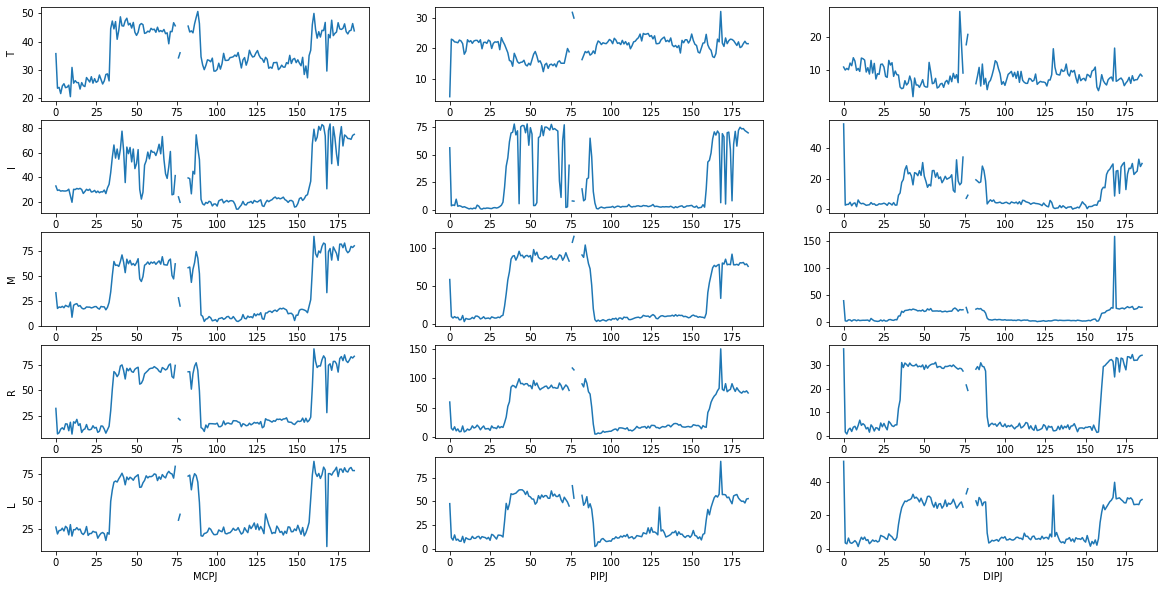

In [90]:

fig = plt.figure()
fig, axs = plt.subplots(5,3,figsize=(20,10))
for i, ax in enumerate(axs.flat):
    # print(i)
    ax.plot(angles.iloc[:,i+1].values)
    # ax.set_title(f'{finger_list[i]}')
plt.setp(axs[-1,0], xlabel='MCPJ')  
plt.setp(axs[-1,1], xlabel='PIPJ')  
plt.setp(axs[-1,2], xlabel='DIPJ')    
plt.setp(axs[0,0], ylabel='T')    
plt.setp(axs[1,0], ylabel='I')  
plt.setp(axs[2,0], ylabel='M')  
plt.setp(axs[3,0], ylabel='R')  
plt.setp(axs[4,0], ylabel='L')  
plt.show()

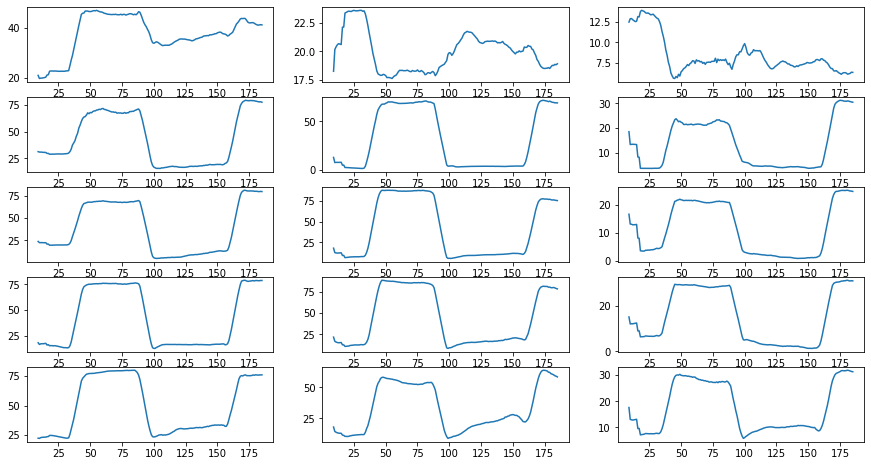

In [4]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(10).mean())
plt.show()

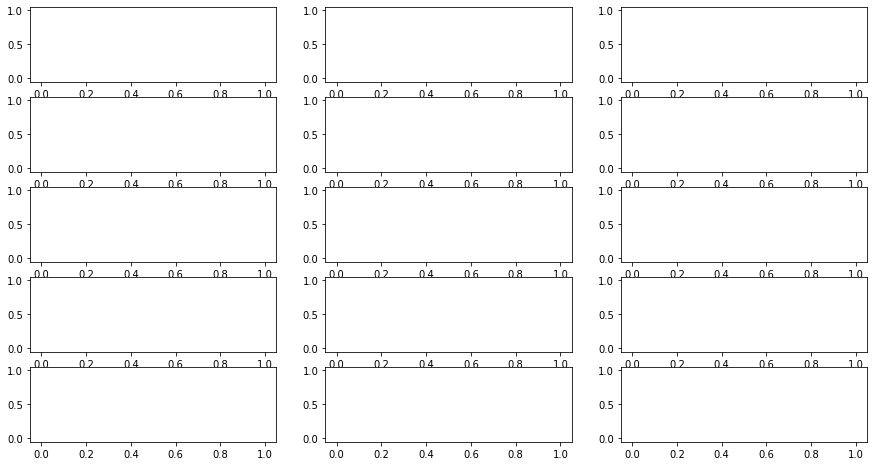

In [84]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(24).mean())
plt.show()

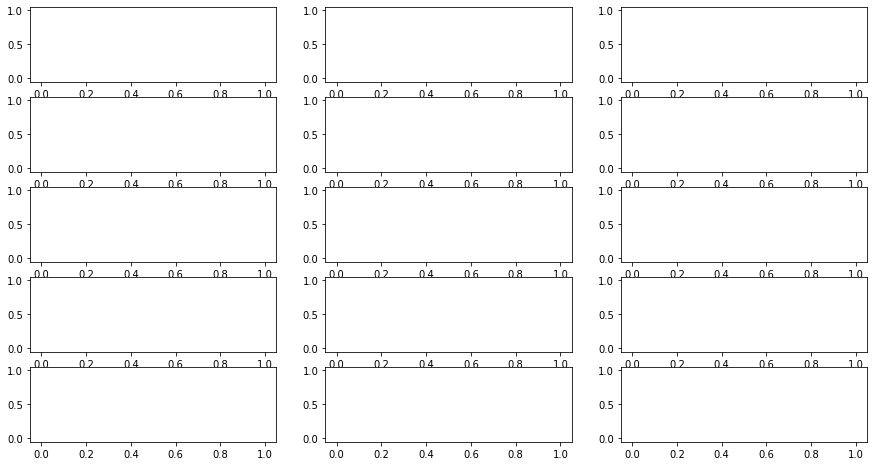

In [85]:
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(5,3,i)
    plt.plot(angles.iloc[:,i].rolling(5, win_type='gaussian').mean(std=angles.std().mean()))
plt.show()

In [7]:
from scipy import signal
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window
    return filtered

In [8]:
# df.apply(lambda srs: apply_convolution(srs, 100)).plot(figsize=(12, 8))
plt.figure(figsize=(15,8))

for i in range(1,16):
    plt.subplot(4,4,i)
    angles.apply(lambda srs: apply_convolution(srs, 100)).plot()
plt.show()